### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
from itertools import cycle

In [2]:
print(tf. __version__)

2.18.0


### Defining the path of dataset directory

In [3]:
dataset_path = r"C:\Users\Ishaan\Desktop\6thSem\Machine Learning\PROJECT\Plant_Disease_Prediction\Plant-Disease-Detection\dataset-2"

### Visualizing the images and Resize images

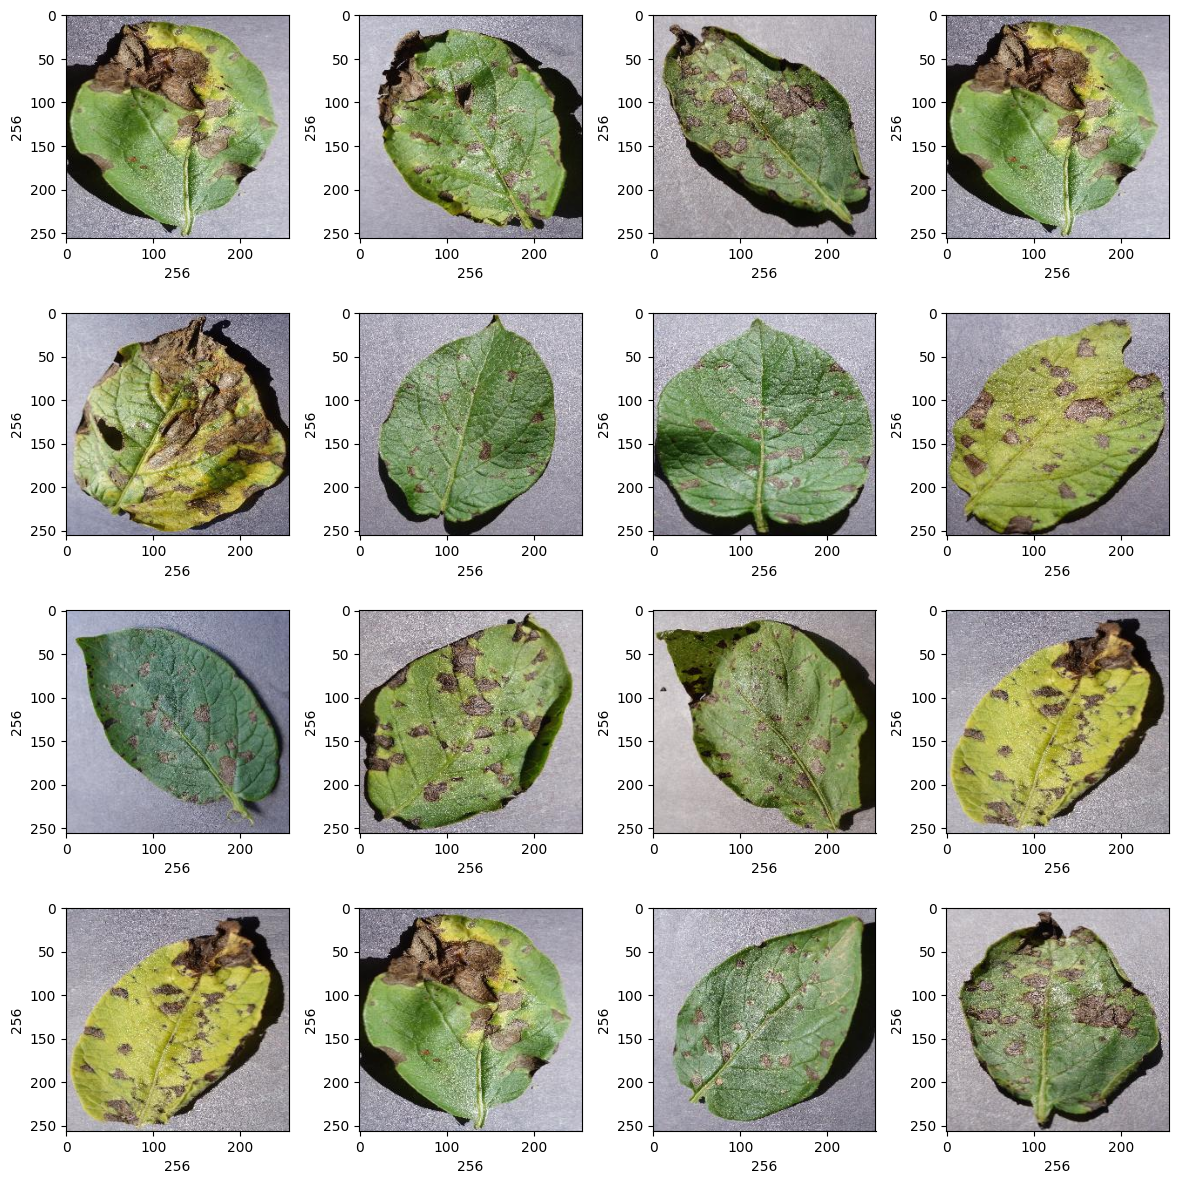

In [4]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = r"dataset-2\Potato-Early_blight"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

### Convert the images into a Numpy array and normalize them

In [5]:
# Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
dataset_path = r"dataset-2"
labels = os.listdir(dataset_path)

print(labels)

['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']


In [7]:
dataset_path = r"dataset-2"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

### Visualize the class count and Check for class imbalance

In [8]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
2    40
1    38
0    34
Name: count, dtype: int64

In [9]:
# it is a balanced dataset as we can see

In [10]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [11]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(112,)

### Splitting the dataset into train, validate and test sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [13]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Performing one-hot encoding on target variable

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Creating the model architecture, compile the model and then fit it using the training data

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

c:\Users\Ishaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [17]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [18]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4930 - loss: 1.0666 - val_accuracy: 0.6111 - val_loss: 1.0013
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5070 - loss: 1.0076 - val_accuracy: 0.5000 - val_loss: 0.9859
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5352 - loss: 0.9525 - val_accuracy: 0.5556 - val_loss: 0.9315
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5775 - loss: 0.8957 - val_accuracy: 0.6111 - val_loss: 0.8790
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6197 - loss: 0.8487 - val_accuracy: 0.6111 - val_loss: 0.8402
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6197 - loss: 0.8030 - val_accuracy: 0.6111 - val_loss: 0.8108
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6338 - loss: 0.7579 - val_accuracy: 0.5556 - val_loss: 0.7818
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7042 - loss: 0.7147 - val_accuracy: 0.6111 - val_loss: 0.7490
Epoch 9/50
1/1 ━

### Plot the accuracy and loss against each epoch

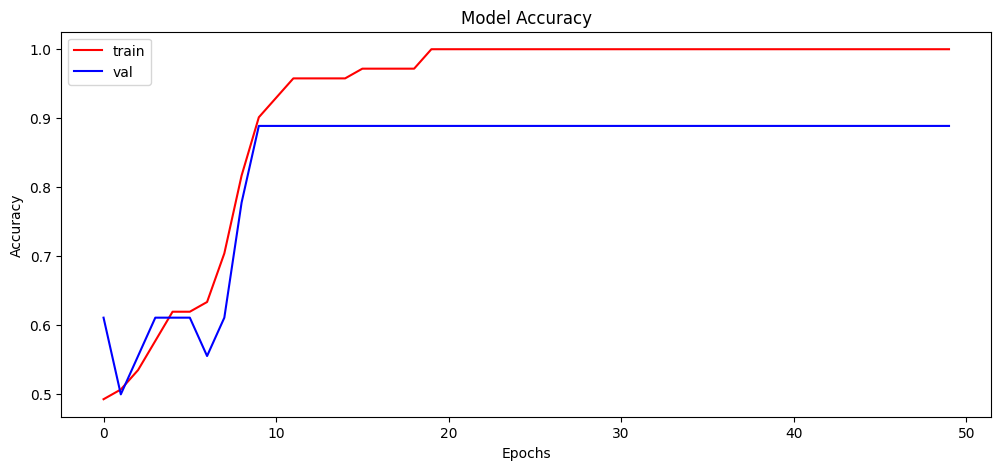

In [19]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

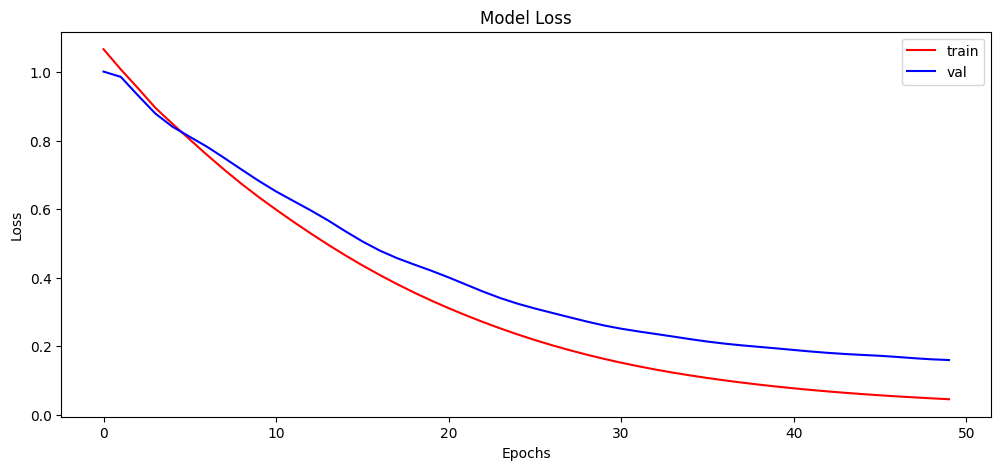

In [20]:
# Plot the training history - Loss
plt.figure(figsize = (12, 5))
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [21]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9565 - loss: 0.1549
Test Accuracy: 95.652174949646


### Make predictions on testing data

In [22]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


### Visualizing the original and predicted labels for the test images

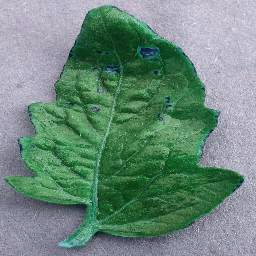

In [23]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

In [24]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Tomato-Bacterial_spot
Predicted :  Potato-Early_blight
[1.8630548e-05 8.1474371e-03 9.9183393e-01]


In [25]:
for i in range(20):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Tomato-Bacterial_spot   Tomato-Bacterial_spot
Tomato-Bacterial_spot   Tomato-Bacterial_spot
Tomato-Bacterial_spot   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Corn-Common_rust   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Tomato-Bacterial_spot   Tomato-Bacterial_spot
Tomato-Bacterial_spot   Tomato-Bacterial_spot
Tomato-Bacterial_spot   Tomato-Bacterial_spot
Corn-Common_rust   Tomato-Bacterial_spot
Corn-Common_rust   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot
Tomato-Bacterial_spot   Tomato-Bacterial_spot
Potato-Early_blight   Tomato-Bacterial_spot


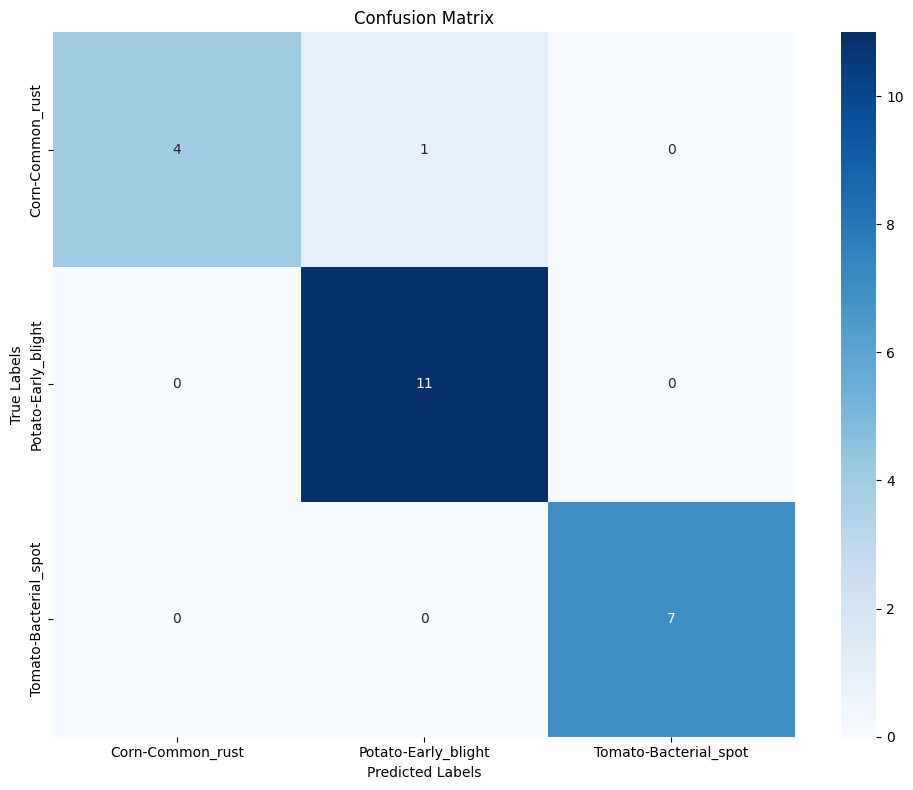

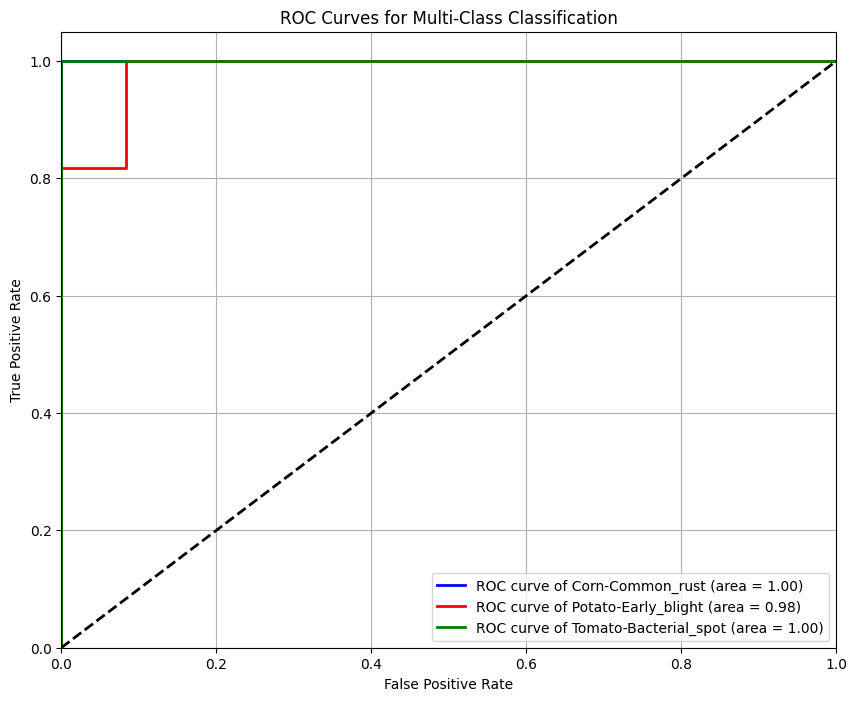


Classification Report:
                       precision    recall  f1-score    support
Corn-Common_rust        1.000000  0.800000  0.888889   5.000000
Potato-Early_blight     0.916667  1.000000  0.956522  11.000000
Tomato-Bacterial_spot   1.000000  1.000000  1.000000   7.000000
accuracy                0.956522  0.956522  0.956522   0.956522
macro avg               0.972222  0.933333  0.948470  23.000000
weighted avg            0.960145  0.956522  0.955051  23.000000

Results Comparison (First 100 samples):
    Sample                 Actual              Predicted  Correct
0        0  Tomato-Bacterial_spot  Tomato-Bacterial_spot     True
1        1  Tomato-Bacterial_spot  Tomato-Bacterial_spot     True
2        2  Tomato-Bacterial_spot  Tomato-Bacterial_spot     True
3        3    Potato-Early_blight    Potato-Early_blight     True
4        4    Potato-Early_blight    Potato-Early_blight     True
5        5    Potato-Early_blight    Potato-Early_blight     True
6        6    Potato-Earl

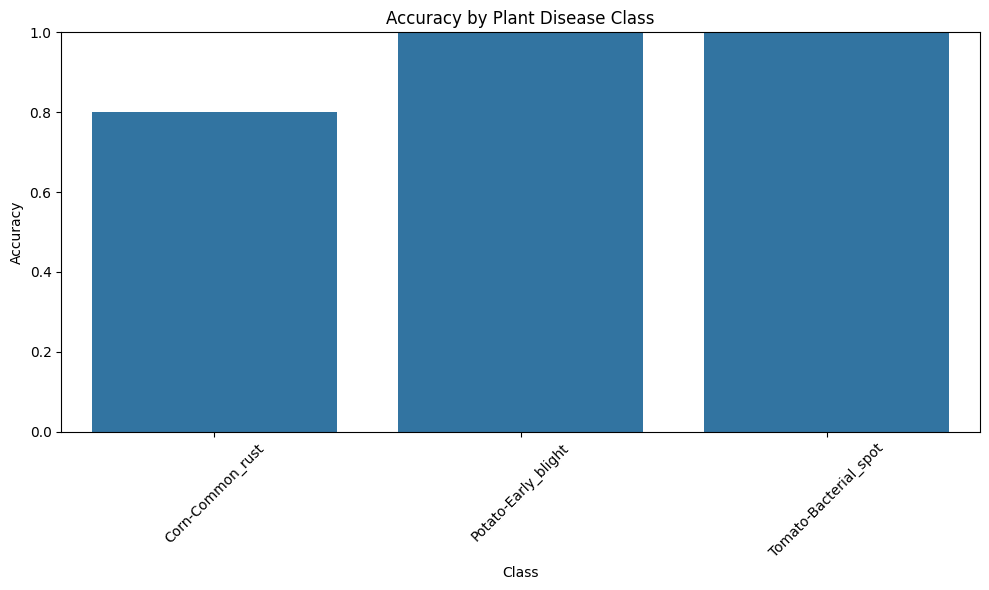

In [27]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=all_labels, 
            yticklabels=all_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Generate ROC curve and AUC for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {all_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Generate detailed classification report
report = classification_report(y_test_class, y_pred_class, target_names=all_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

# Create a comparison table of actual vs predicted labels
results_data = []
for i in range(100):  # Showing first 100 samples
    if i < len(y_test_class):
        results_data.append({
            'Sample': i,
            'Actual': all_labels[y_test_class[i]],
            'Predicted': all_labels[y_pred_class[i]],
            'Correct': y_test_class[i] == y_pred_class[i]
        })

results_df = pd.DataFrame(results_data)
print("\nResults Comparison (First 100 samples):")
print(results_df)

# Save the comparison results to CSV
results_df.to_csv(r"C:\Users\Ishaan\Desktop\6thSem\Machine Learning\PROJECT\Plant_Disease_Prediction\Plant-Disease-Detection\Results\prediction_comparison.csv", index=False)

# Calculate per-class accuracy 
class_accuracy = {}
for i in range(n_classes):
    class_indices = np.where(y_test_class == i)[0]
    if len(class_indices) > 0:
        class_correct = np.sum(y_pred_class[class_indices] == i)
        class_accuracy[all_labels[i]] = class_correct / len(class_indices)

# Create and display class accuracy table
class_acc_df = pd.DataFrame(list(class_accuracy.items()), columns=['Class', 'Accuracy'])
print("\nPer-Class Accuracy:")
print(class_acc_df)

# Plot per-class accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Accuracy', data=class_acc_df)
plt.title('Accuracy by Plant Disease Class')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()